# AlexNet
## 主要贡献： 
1. 使用了大量的数据增强；

2. 将卷积神经网络中的卷积和矩阵乘法在硬件上并行化，实现了快速卷积运算；

3. 使用了Dropout和ReLu激活函数,来提高模型泛化能力和收敛能力；

4. 使用了比LeNet更深的层数。

## AlexNt结构：
AlexNet由八层组成，五个卷积层，两个全连接隐藏层和一个全连接输出层。
* **第一个卷积层**：$11 \times 11$ 卷积核，步长为4，padding为1，输出通道数96；后接ReLu和最大池化层，$3 \times 3$ 池化窗口，步长为2；

    输入: $3 \times 224 \times 224$

    输出: $96 \times 26 \times 26$

* **第二个卷积层**：$5 \times 5$ 卷积核，步长为1，padding为2，输出通道数为256；后接Relu和最大池化层，$3 \times 3$ 池化窗口，步长为2；

    输入: $96 \times 26 \times 26$

    输出: $256 \times 12 \times 12$

* **第三个卷积层**：$3 \times 3$ 卷积核，步长为1，padding为1，输出通道数为384；后接ReLu；

    输入: $256 \times 12 \times 12$

    输出: $384 \times 12 \times 12$

* **第四个卷积层**：$3 \times 3$ 卷积核，步长为1，padding为1，输出通道数为384；后接ReLu；

    输入: $384 \times 12 \times 12$

    输出: $384 \times 12 \times 12$

* **第五个卷积层**：$3 \times 3$ 卷积核，步长为1，padding为1，输出通道数为256；后接ReLu和最大池化层，$3 \times 3$ 池化窗口，步长为2；

    输入: $384 \times 12 \times 12$

    输出: $256 \times 5 \times 5$

* **第一个全连接层**：输入尺寸为 $256 \times 5 \times 5$ 展平为 6400 ，输出尺寸为 4096，后接ReLu，同时加Dropout；

* **第二个全连接层**：输入尺寸为 4096 ，输出尺寸为 4096，后接ReLu，同时加Dropout；

* **第三个全连接层**：输入尺寸为 4096 ，输出尺寸为 10。

![](./img/alexnet.svg#pic_center "AlexNet")



In [2]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
import torch.utils.data as data
import torch.nn.functional as F
# from torchsummary import summary

# 这里用Fashion_Mnist所以通道数是1

class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet,self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(1,96,kernel_size= 11, padding =1, stride = 4),
                                  nn.ReLU(),
                                  nn.MaxPool2d(3,2))
        self.conv2 = nn.Sequential(nn.Conv2d(96,256,kernel_size= 5, padding =2, stride = 1),
                                  nn.ReLU(),
                                  nn.MaxPool2d(3,2))
        self.conv3 = nn.Sequential(nn.Conv2d(256,384,kernel_size=3, padding= 1, stride= 1),
                                   nn.ReLU())
        self.conv4 = nn.Sequential(nn.Conv2d(384,384,kernel_size=3, padding= 1, stride= 1),
                                   nn.ReLU())
        
        self.conv5 = nn.Sequential(nn.Conv2d(384,256,kernel_size=3, padding= 1, stride= 1),
                                   nn.ReLU(),
                                   nn.MaxPool2d(3,2))
        self.dense1 = nn.Sequential(nn.Flatten(),
                                    nn.Linear(6400,4096),
                                    nn.ReLU(),
                                    nn.Dropout(p=0.5))
        self.dense2 = nn.Sequential(nn.Linear(4096,4096),
                                    nn.ReLU(),
                                    nn.Dropout(p=0.5))
        self.dense3 = nn.Linear(4096,10)

    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x


net = AlexNet()
net.eval()
for param in net.parameters():
    print(type(param), param.shape)
# summary(net.cuda,(1,224,224))


<class 'torch.nn.parameter.Parameter'> torch.Size([96, 1, 11, 11])
<class 'torch.nn.parameter.Parameter'> torch.Size([96])
<class 'torch.nn.parameter.Parameter'> torch.Size([256, 96, 5, 5])
<class 'torch.nn.parameter.Parameter'> torch.Size([256])
<class 'torch.nn.parameter.Parameter'> torch.Size([384, 256, 3, 3])
<class 'torch.nn.parameter.Parameter'> torch.Size([384])
<class 'torch.nn.parameter.Parameter'> torch.Size([384, 384, 3, 3])
<class 'torch.nn.parameter.Parameter'> torch.Size([384])
<class 'torch.nn.parameter.Parameter'> torch.Size([256, 384, 3, 3])
<class 'torch.nn.parameter.Parameter'> torch.Size([256])
<class 'torch.nn.parameter.Parameter'> torch.Size([4096, 6400])
<class 'torch.nn.parameter.Parameter'> torch.Size([4096])
<class 'torch.nn.parameter.Parameter'> torch.Size([4096, 4096])
<class 'torch.nn.parameter.Parameter'> torch.Size([4096])
<class 'torch.nn.parameter.Parameter'> torch.Size([10, 4096])
<class 'torch.nn.parameter.Parameter'> torch.Size([10])


In [31]:
# 继承nn.Module实现的模型，无法直接拿到layer，但是可以通过children来拿到所有的Block
# 每个Block其实又可以拿到自己的children


X = torch.rand(size = (18,1,224,224),dtype=torch.float32)
print(X.shape)
for layer in net.children():
    X = layer(X)
    print(X.shape)

torch.Size([18, 1, 224, 224])
torch.Size([18, 96, 26, 26])
torch.Size([18, 256, 12, 12])
torch.Size([18, 384, 12, 12])
torch.Size([18, 384, 12, 12])
torch.Size([18, 256, 5, 5])
torch.Size([18, 4096])
torch.Size([18, 4096])
torch.Size([18, 10])


# 使用Fashion Mnist数据集做训练


<class 'torch.Tensor'> torch.Size([18, 1, 224, 224])


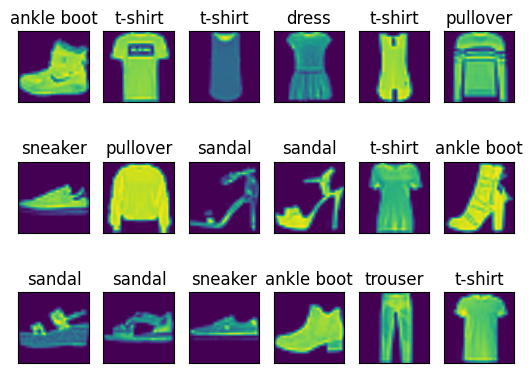

In [32]:
import matplotlib.pyplot as plt

trans = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])
mnist_train = torchvision.datasets.FashionMNIST('../../../DataSets/',train=True,transform=trans,download= False)
mnist_test = torchvision.datasets.FashionMNIST('../../../DataSets/',train=False,transform=trans,download= False)

text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

def get_Fashion_Mnist_labels(labels):
    return [text_labels[i] for i in labels]

def show_img(imgs, num_rows, num_cols, titles =None, scale = 1.5):
    figsize = num_rows*num_cols*scale
    plt.figure(figsize)
    axes = []
    for i in range(num_rows*num_cols):
        axe = plt.subplot(num_rows,num_cols,i+1)
        axes.append(axe)
    for i, (axe,img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            # 图片张量
            axe.imshow(img.numpy())
        else:
            # PIL图片
            axe.imshow(img)
        axe.axes.get_xaxis().set_visible(False)
        axe.axes.get_yaxis().set_visible(False)
        if titles:
            axe.set_title(titles[i])

X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
print(type(X),X.shape)
# y_hat = net(X)
# print(y_hat)
show_img(X.reshape(18,224,224),3,6,titles = get_Fashion_Mnist_labels(y))

# 模型训练

In [33]:
import wandb

# 超参数
batch_size = 128
num_epochs = 10
lr =0.01

wandb.init(
    project ='AlexNet',
    config={
    "learning_rate": lr,
    "architecture": "AlexNet",
    "dataset": 'Fashion_Mnist(Resize 224)',
    "epochs": num_epochs,
    "batch size":batch_size
    }
)

train_loader = data.DataLoader(mnist_train,batch_size,shuffle= True)
test_loader = data.DataLoader(mnist_test,shuffle= False,num_workers=4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
optimzer = torch.optim.SGD(net.parameters(),lr = lr)
loss = nn.CrossEntropyLoss()

# 权重初始化
def init_weight(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight) 
net.apply(init_weight)



def test(net,test_loader,loss,device):
    net.eval()
    num_correct = 0
    test_loss = 0
    with torch.no_grad():
        for X,y in test_loader:
            X,y = X.to(device),y.to(device)
            y_hat = net(X)
            l = loss(y_hat,y)
            test_loss += l.item()
            pred = torch.argmax(y_hat,dim=1)
            num_correct += torch.eq(pred,y).sum().item()
    return test_loss/len(test_loader.dataset), num_correct/len(test_loader.dataset)

def train(num_epochs,net,train_loader,loss,optimzer,device):

    print('Training start:')
    for epoch in range(num_epochs):
        net.train()
        num_correct = 0
        train_loss = 0
        for batch_idx, (X,y) in enumerate(train_loader):
            optimzer.zero_grad()
            X,y = X.to(device),y.to(device)
            y_hat = net(X)
            l = loss(y_hat,y)
            l.backward()
            optimzer.step()
            pred = torch.argmax(y_hat,dim = 1)
            num_correct += torch.eq(pred,y).sum().item()
            train_loss += l.item()
            # print('Batch {}: train loss {:.4f},lr {}'.format(batch_idx,l.item(),optimzer.param_groups[0]['lr']))
        train_loss = train_loss / (len(train_loader.dataset)/batch_size)
        train_acc = num_correct / len(train_loader.dataset)
        test_loss,test_acc = test(net,test_loader,loss,device)
        print('Epoch {}: train accuracy = {:.4f},train loss = {:.4f}; test accuracy = {:.4f}, test loss = {:.4f}'.format(epoch,train_acc,train_loss,
                                                                                                                        test_acc,test_loss))
        wandb.log({
            "Epoch":epoch,
            "Train accuracy": train_acc,
            "Train loss":train_loss,
            "Test accuracy": test_acc,
            "Test loss": test_loss
        })
    wandb.finish()

train(num_epochs, net,train_loader,loss,optimzer,device)

Training start:
Epoch 0: train accuracy = 0.4972,train loss = 1.3471; test accuracy = 0.7371, test loss = 0.7301
Epoch 1: train accuracy = 0.7538,train loss = 0.6608; test accuracy = 0.7936, test loss = 0.5567
Epoch 2: train accuracy = 0.7960,train loss = 0.5444; test accuracy = 0.8187, test loss = 0.4888
Epoch 3: train accuracy = 0.8201,train loss = 0.4801; test accuracy = 0.8402, test loss = 0.4313
Epoch 4: train accuracy = 0.8384,train loss = 0.4371; test accuracy = 0.8509, test loss = 0.4176
Epoch 5: train accuracy = 0.8506,train loss = 0.4052; test accuracy = 0.8564, test loss = 0.3918
Epoch 6: train accuracy = 0.8608,train loss = 0.3799; test accuracy = 0.8672, test loss = 0.3671
Epoch 7: train accuracy = 0.8683,train loss = 0.3604; test accuracy = 0.8715, test loss = 0.3558
Epoch 8: train accuracy = 0.8746,train loss = 0.3460; test accuracy = 0.8792, test loss = 0.3343
Epoch 9: train accuracy = 0.8796,train loss = 0.3316; test accuracy = 0.8777, test loss = 0.3411


Epoch,▁▂▃▃▄▅▆▆▇█
Test accuracy,▁▄▅▆▇▇▇███
Test loss,█▅▄▃▂▂▂▁▁▁
Train accuracy,▁▆▆▇▇▇████
Train loss,█▃▂▂▂▂▁▁▁▁
Epoch,9
Test accuracy,0.8777
Test loss,0.34106
Train accuracy,0.8796
Train loss,0.33156
